<a href="https://colab.research.google.com/github/linhnt31/coursera-deep-learning-specialization/blob/master/12_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Tải dữ liệu

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ./horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O ./validation-horse-or-human.zip

--2022-01-07 14:09:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.143.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘./horse-or-human.zip’

./horse-or-human.zi 100%[===================>] 142.65M  98.5MB/s    in 1.4s    

2022-01-07 14:09:42 (98.5 MB/s) - ‘./horse-or-human.zip’ saved [149574867/149574867]

--2022-01-07 14:09:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

In [ ]:
train_folder = './horse-or-human'
valid_folder = './validation-horse-or-human'

!unzip -q horse-or-human.zip -d $train_folder

!unzip -q validation-horse-or-human.zip -d $valid_folder

train_horse_dir = './horse-or-human/horses'
train_human_dir = './horse-or-human/humans'
valid_horse_dir = 'validation-horse-or-human/horses'
valid_human_dir = 'validation-horse-or-human/humans'

replace ./horse-or-human/horses/horse01-0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
replace ./horse-or-human/horses/horse01-1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace ./validation-horse-or-human/horses/horse1-000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## 2. Load dữ liệu

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2.1. Chuẩn hóa dữ liệu

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)

### 2.2. Load nhanh dữ liệu dưới dạng generator

In [ ]:
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size= (150, 150),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
generated_train_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder,
    target_size= (150, 150),
    batch_size=128,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


## 3. Xây dựng mô hình

### 3.1. Xây dựng các lớp Convolution

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential(
  [Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(2, 2),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),]
  )

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

### 3.2. Thêm lớp phân loại

In [ ]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

## 4.Tiến hành training

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['acc'])

In [ ]:
history = model.fit_generator(
    generated_train_data,
    epochs = 15, 
    verbose=1,
    validation_data = generated_valid_data,
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
9/9 [==============================] - 8s 690ms/step - loss: 0.7568 - acc: 0.6475 - val_loss: 0.6029 - val_acc: 0.8945
Epoch 2/15
9/9 [==============================] - 6s 713ms/step - loss: 0.5867 - acc: 0.7176 - val_loss: 0.5033 - val_acc: 0.8672
Epoch 3/15
9/9 [==============================] - 6s 712ms/step - loss: 0.5275 - acc: 0.7653 - val_loss: 0.4927 - val_acc: 0.7539
Epoch 4/15
9/9 [==============================] - 6s 795ms/step - loss: 0.4326 - acc: 0.8530 - val_loss: 0.4805 - val_acc: 0.7773
Epoch 5/15
9/9 [==============================] - 6s 697ms/step - loss: 0.3551 - acc: 0.8822 - val_loss: 0.4714 - val_acc: 0.7812
Epoch 6/15
9/9 [==============================] - 6s 706ms/step - loss: 0.2684 - acc: 0.9289 - val_loss: 1.3409 - val_acc: 0.5430
Epoch 7/15
9/9 [==============================] - 7s 724ms/step - loss: 0.2797 - acc: 0.8968 - val_loss: 0.7437 - val_acc: 0.7266
Epoch 8/15
9/9 [==============================] - 7s 721ms/step - loss: 0.1993 - acc: 0.94

## 5. Tiến hành dự đoán

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # prediction Process

  path = './' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img) / 255

  # (1, 150, 150, 3)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  print(images.shape)

  classes = model.predict(images, batch_size=10)

  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving image (3).png to image (3).png
(1, 150, 150, 3)
image (3).png is a human


## 6. Hiển thị feature map

Saving ngoc.jpg to ngoc.jpg
(1, 150, 150, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


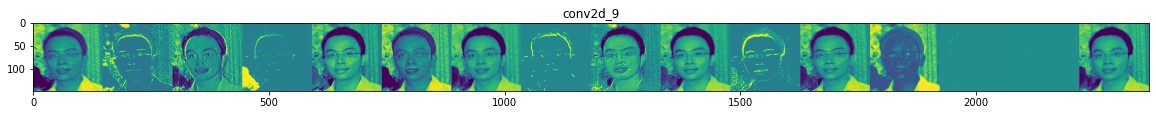

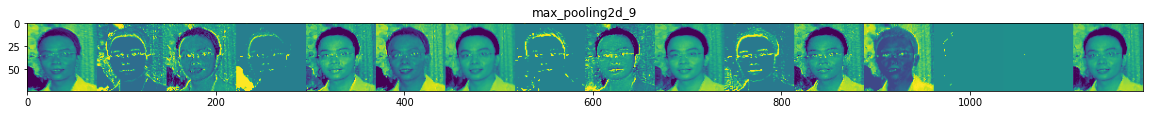

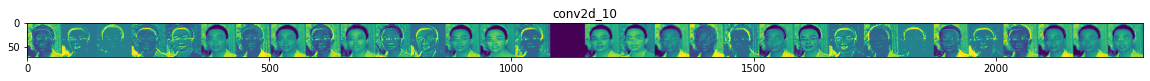

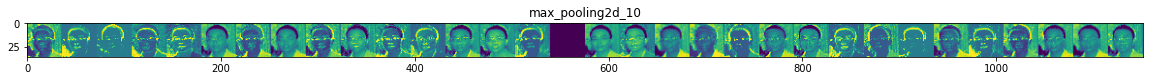

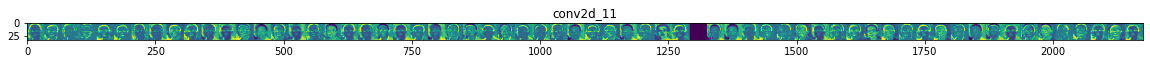

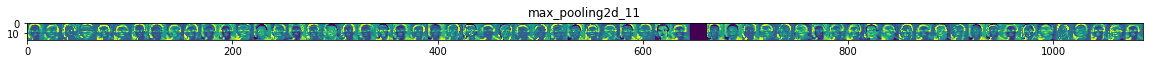

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

ouput_layers = [
  layer.output for layer in model.layers

]

uploaded = files.upload()

for fn in uploaded.keys():

  # prediction Process

  path = './' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img) / 255

  x = x.reshape((1,) + x.shape)


  print(x.shape)

  visualization_model = tf.keras.models.Model(inputs = model.input, outputs = ouput_layers)

  successive_feature_maps = visualization_model.predict(x)


  layer_names = [layer.name for layer in model.layers]

  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
      n_features = feature_map.shape[-1]  # number of features in feature map
      # The feature map has shape (1, size, size, n_features)
      size = feature_map.shape[1]
      # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))
      for i in range(n_features):
        # Postprocess the feature to make it visually palatable
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        # We'll tile each filter into this big horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x
      # Display the grid
      scale = 20. / n_features
      plt.figure(figsize=(scale * n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')
